In [23]:
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn import model_selection, naive_bayes, svm
import re, os, sys, platform, json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.colors

# Code modified from this Tutorial from Paul Vierthaler:
# https://github.com/vierth/humanitiesTutorial/blob/master/22_stylometry1_hca.py

# We now have all the pieces we need to start doing stylometry! 
# Let's import the libraries we will need:

import re, nltk, os
from pandas import DataFrame
import numpy as np

# The components for analysis:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy.cluster.hierarchy import linkage, dendrogram

# The components for viz & pprint
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

import pandas as pd# Code modified from this Tutorial from Paul Vierthaler:
# https://github.com/vierth/humanitiesTutorial/blob/master/22_stylometry1_hca.py

# We now have all the pieces we need to start doing stylometry! 
# Let's import the libraries we will need:

import re, nltk, os
from pandas import DataFrame
import numpy as np

# The components for analysis:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy.cluster.hierarchy import linkage, dendrogram

# The components for viz & pprint
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

import pandas as pd

In [2]:
df = pd.read_csv("mydata.csv")
df = df.drop(["Unnamed: 0"],axis = 1)

In [3]:
df.Normalized_list = df.Normalized_list.apply(literal_eval)
df.Sent_Token = df.Sent_Token.apply(literal_eval)

In [37]:
df["Cleaned_text"] = df["Cleaned_text"].values.astype('U')

In [56]:
# for 1a-1b, I will use raw text for each speaker
raw = []
speaker = []
h = []
t = []
b = []
o = []
s = []
for i,row in df.iterrows():
    if row["Speaker"] == 'HILLARY':
        raw.append(row["Cleaned_text"])
        speaker.append(["H","Hillary"])
        h.append(row["Cleaned_text"])
    if row["Speaker"] == 'TRUMP':
        raw.append(row["Cleaned_text"])
        speaker.append(["T","Trump"])
        t.append(row["Cleaned_text"])
    if row["Speaker"] == "OBAMA":
        raw.append(row["Cleaned_text"])
        speaker.append(["O","Obama"])
        o.append(row["Cleaned_text"])
    if row["Speaker"] == "BUSH":
        raw.append(row["Cleaned_text"])
        speaker.append(["B","Bush"])
        b.append(row["Cleaned_text"])
    if row["Speaker"] == "SANDERS":
        raw.append(row["Cleaned_text"])
        speaker.append(["S","Sanders"])
        s.append(row["Cleaned_text"])

In [15]:
# Size of n-grams:
ngrams = 1

# Limit the number of words to look at
commonWords = 500 

# Set the vocabulary you are interested in
limitVocab = False

# Vocabulary file
limitVocabularyFile = "vocab.txt"

In [26]:
# How many components?
pcaComponents = 2         # Only useful for digging even deeper in the data

# Input folder
corpusFolder = "Data"

# Items to remove from consideration:
removeItemsFile = "remove.txt"

In [27]:
# Types of labels for documents in the corpus
labelTypes = ('author', 'title', 'section', 'genre') # tuple with strings

# Index of label used to set Color:
colorValue = 1 # Index of label to use for color (integer). Here 1 points to "_h/c/t/x"

# Index of label to use for plot labels (if points are labeled)
labelValue = 0 # Index of label to use for labels (integer). Here 0 points to "title"

# Point size (integer)
pointSize = 5 #8

# Show point labels (add labels for each text):
pointLabels = True # True or False

# Plot loadings (write the characters tot he plot)
plotLoadings = False # True or False

# Hide points (useful for seeing loadings better):
hidePoints = False # True or False

# Output file info (dimensions are in inches (width, height)):
outputDimensions = (10, 7.5) # Tuple of integers or floats

# Output file extension determines output type. Save as a pdf if you want to edit in illustator
# PDF Output on mac is very large, but just opening and saving a copy in illustrator will fix this
outputFile = "WS_PCA.pdf" #"myfigure.png"

Loading, cleaning, and tokenizing
Vectorizing
Normalizing values
Performing PCA
Setting plot info
Plotting texts
Adding Labels


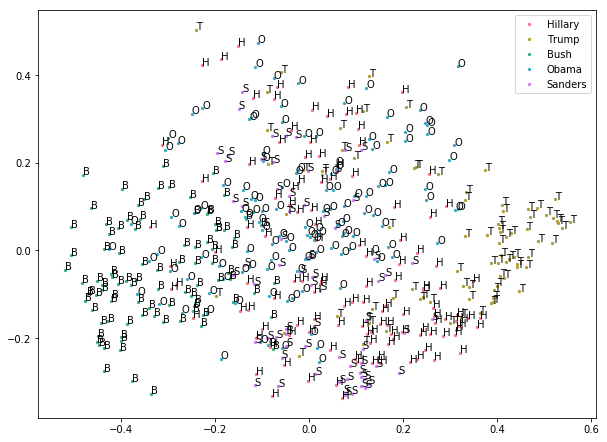

In [53]:



##############
# Load Texts #
##############

print("Loading, cleaning, and tokenizing")
# Go through each document in the corpus folder and save info to lists
texts = raw
labels = speaker

####################
# Perform Analysis #
####################

print("Vectorizing")
countVectorizer = TfidfVectorizer(max_features=commonWords, use_idf=False, vocabulary=limitVocabulary,  ngram_range=(ngrams, ngrams))
countMatrix = countVectorizer.fit_transform(texts)
print("Normalizing values")
countMatrix = normalize(countMatrix)
countMatrix = countMatrix.toarray()

print("Performing PCA")
# Lets perform PCA on the countMatrix:
pca = PCA(n_components=pcaComponents)
myPCA = pca.fit_transform(countMatrix)


##############
# Plot Setup #
##############

print("Setting plot info")
# set the plot size
plt.figure(figsize=outputDimensions)

# find all the unique values for each of the label types
uniqueLabelValues = [set() for i in range(len(labelTypes))]
for labelList in labels:
    for i, label in enumerate(labelList):
        uniqueLabelValues[i].add(label)

# create color dictionaries for all labels
colorDictionaries = []
for uniqueLabels in uniqueLabelValues:
    colorpalette = sns.color_palette("husl",len(uniqueLabels)).as_hex()
    colorDictionaries.append(dict(zip(uniqueLabels,colorpalette)))

# Now we need the Unique Labels
uniqueColorLabels = list(uniqueLabelValues[colorValue])
# Let's get a number for each class
numberForClass = [i for i in range(len(uniqueColorLabels))]

# Make a dictionary! This is new sytax for us! It just makes a dictionary where
# the keys are the unique years and the values are found in numberForClass
labelForClassNumber = dict(zip(uniqueColorLabels,numberForClass))

# Let's make a new representation for each document that is just these integers
# and it needs to be a numpy array
textClass = np.array([labelForClassNumber[lab[colorValue]] for lab in labels])


# Make a list of the colors
colors = [colorDictionaries[colorValue][lab] for lab in uniqueColorLabels]

if hidePoints:
    pointSize = 0

###################
# Create the plot #
###################

print("Plotting texts")
for col, classNumber, lab in zip(colors, numberForClass, uniqueColorLabels):
    plt.scatter(myPCA[textClass==classNumber,0],myPCA[textClass==classNumber,1],label=lab,c=col, s=pointSize)

# Let's label individual points so we know WHICH document they are
if pointLabels:
    print("Adding Labels")
    for lab, datapoint in zip(labels, myPCA):
        plt.annotate(str(lab[labelValue]),xy=datapoint)

# Let's graph component loadings
vocabulary = countVectorizer.get_feature_names()
loadings = pca.components_
if plotLoadings:
    print("Rendering Loadings")    
    for i, word in enumerate(vocabulary):
        plt.annotate(word, xy=(loadings[0, i], loadings[1,i]))
    

# Let's add a legend! matplotlib will make this for us based on the data we 
# gave the scatter function.
plt.legend()
plt.savefig(outputFile)


############################################
# Output data for JavaScript Visualization #
############################################

data = []
for datapoint in myPCA:
    pcDict = {}
    for i, dp in enumerate(datapoint):
        pcDict[f"PC{str(i + 1)}"] = dp
    data.append(pcDict)

jsLoadings = []
for i, word in enumerate(vocabulary):
    temploading = {}
    for j,dp in enumerate(loadings):
        temploading[f"PC{str(j+1)}"] = dp[i]
    jsLoadings.append([word, temploading])

colorDictionaryList = []
for cd in colorDictionaries:
    cdlist = [v for v in cd.values()]
    colorDictionaryList.append(cdlist)

colorstrings = json.dumps(colorDictionaryList)
labelstrings = json.dumps(labels)
valuetypes = json.dumps([k for k in data[0].keys()])
datastrings = json.dumps(data)

limitedlabeltypes = []
for i, t in enumerate(labelTypes):
    if len(uniqueLabelValues[i]) <= 20:
        limitedlabeltypes.append(t)

cattypestrings = json.dumps(limitedlabeltypes)
loadingstrings = json.dumps(jsLoadings)
stringlist = [f"var colorDictionaries = {colorstrings};", f"var labels = {labelstrings};",
            f"var data = {datastrings};", f"var categoryTypes = {list(labelTypes)};", 
            f"var loadings = {jsLoadings};", f"var valueTypes = {valuetypes};",
            f"var limitedCategories = {limitedlabeltypes};",
            f"var activecatnum = {colorValue};", f"var activelabelnum = {labelValue};"]


with open("data.js", "w", encoding="utf8") as wf:
    wf.write("\n".join(stringlist))



# Show the plot
plt.show()

In [63]:
h1 = " ".join(h)
s1 = " ".join(s)
o1 = " ".join(o)
t1 = " ".join(t)
b1 = " ".join(b)
text1 = [h1,s1,o1,t1,b1]
speaker1 = ["Hillary","Sanders","Obama","Trump","Bush"] 

In [64]:
# Get the frequencies of the 1000 most common TF (without IDF) [=ngrams] in the corpus 
countVectorizer = TfidfVectorizer(max_features=999999, use_idf=False) # Paul limits this to 1000 ngrams, worth playing with
countMatrix = countVectorizer.fit_transform(text1)
# We can measure the distances between all of these documents using a variety of metrics.
# There are many assumptions these distance metrics make (and some might be better than others).
similarity = euclidean_distances(countMatrix)
# We can group these documents together based on which ones are closest 
# together using Hierarchical Cluster Analysis. Here we use the "Ward" algorithm.
# 
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html for
# documentation of other HCA models, e.g. 'single', 'complete', 'weighted', and 'median'.
linkages = linkage(similarity,'ward')

C:\Users\hengj\Anaconda_3\lib\site-packages\ipykernel_launcher.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if sys.path[0] == '':


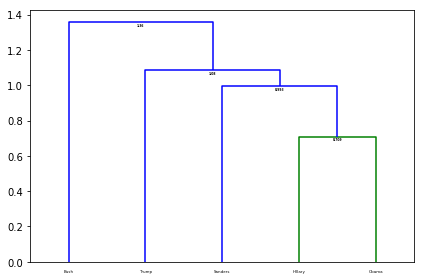

In [65]:
f = plt.figure()

# Here we will use scipy's dendogram function (which we imported) to plot this:
dendr = dendrogram(linkages, labels=speaker1, leaf_font_size=4) #orientation="right",

# We'll adjust the plot a bit to make it better
plt.tick_params(axis='x', which='both')  #, bottom=False, top=False, labelbottom=False)

# This will prevent the labels from going off the figure
plt.tight_layout()

for i, d in zip(dendr['icoord'], dendr['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y) #, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -1),
                         textcoords='offset points',
                         va='top', ha='center', fontsize=3, fontweight='bold')

plt.show()

f.savefig("HCA.pdf", bbox_inches='tight')